# initial settings

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, log_loss
from sklearn.utils import resample
# 시각화 라이브러리
import matplotlib.pyplot as plt

# 데이터셋 로드
data = pd.read_csv("voice.csv")

# 데이터 인코딩 (문자열로 된 레이블을 숫자로 변환: 모델이 이해할 수 있도록)
label_map = {'male': 0, 'female': 1}
data['label'] = data['label'].replace(label_map)

# X, y 분리
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

# 데이터 정규화 (data preprocessing: zero-center and normalize)
X = (X - X.mean()) / X.std()

In [ ]:
# 데이터를 train data, test data 로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random state: 호출할 때마다 동일한 train, test dataset를 생성하기 위한 난수 값

# MLP_1 - fastest

유경빈 팀원

In [ ]:
# MLP 모델 정의
model_mlp1 = tf.keras.Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Loss & Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # 기본 learning rate: 0.001

# 모델 컴파일
model_mlp1.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 콜백 함수 정의
callbacks_mlp1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# 시작 시간 기록
start_time = time.time()

# train
model_mlp1.fit(X_train, y_train, epochs=100, batch_size=64, shuffle=True,
               validation_data=(X_test, y_test),
               callbacks=callbacks_mlp1)

# 종료 시간 기록 및 총 소요 시간 계산
end_time = time.time()
training_time = end_time - start_time
print("first MLP model's training time:", training_time, "seconds")

Epoch 1/100
40/40 [==============================] - 11s 23ms/step - loss: 0.4008 - accuracy: 0.8303 - val_loss: 0.0889 - val_accuracy: 0.9795
Epoch 2/100
40/40 [==============================] - 1s 14ms/step - loss: 0.1059 - accuracy: 0.9692 - val_loss: 0.0665 - val_accuracy: 0.9795
Epoch 3/100
40/40 [==============================] - 0s 10ms/step - loss: 0.0840 - accuracy: 0.9759 - val_loss: 0.0679 - val_accuracy: 0.9763
Epoch 4/100
40/40 [==============================] - 1s 14ms/step - loss: 0.0711 - accuracy: 0.9803 - val_loss: 0.0570 - val_accuracy: 0.9795
Epoch 5/100
40/40 [==============================] - 0s 11ms/step - loss: 0.0629 - accuracy: 0.9799 - val_loss: 0.0710 - val_accuracy: 0.9763
Epoch 6/100
40/40 [==============================] - 0s 10ms/step - loss: 0.0584 - accuracy: 0.9811 - val_loss: 0.0582 - val_accuracy: 0.9795
Epoch 7/100
40/40 [==============================] - 0s 10ms/step - loss: 0.0495 - accuracy: 0.9830 - val_loss: 0.0593 - val_accuracy: 0.9779
Epoch

In [ ]:
# 모델 평가
print("MLP_1 model evaluation: ")
model_mlp1.evaluate(X_test, y_test, verbose=2)


# + for graph
mlp1_loss, mlp1_accuracy = model_mlp1.evaluate(X_test,  y_test, verbose=2)

MLP_1 model evaluation: 
20/20 - 0s - loss: 0.0570 - accuracy: 0.9795 - 141ms/epoch - 7ms/step
20/20 - 0s - loss: 0.0570 - accuracy: 0.9795 - 176ms/epoch - 9ms/step


# MLP_2 - second fastest
장윤서 팀원

In [ ]:
# 모델 정의
model_mlp2 = Sequential([
    Dense(512, input_shape=(20,), activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
# Loss & Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model_mlp2.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# 콜백 함수 정의
callbacks_mlp2 = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
# 시작 시간 기록
start_time = time.time()

# train
model_mlp2.fit(X_train, y_train,
              epochs=150,
              batch_size=32,
              validation_split=0.2, ## 설명 + validation data 안 들어가도 되는지
              shuffle=True,
              callbacks=callbacks_mlp2)

# 종료 시간 기록 및 총 소요 시간 계산
end_time = time.time()
training_time = end_time - start_time
print("second MLP model's training time:", training_time, "seconds")

Epoch 1/150
64/64 [==============================] - 4s 20ms/step - loss: 0.2224 - accuracy: 0.9206 - val_loss: 0.0517 - val_accuracy: 0.9901
Epoch 2/150
64/64 [==============================] - 1s 14ms/step - loss: 0.0924 - accuracy: 0.9704 - val_loss: 0.0426 - val_accuracy: 0.9941
Epoch 3/150
64/64 [==============================] - 0s 7ms/step - loss: 0.0807 - accuracy: 0.9729 - val_loss: 0.0445 - val_accuracy: 0.9862
Epoch 4/150
64/64 [==============================] - 0s 7ms/step - loss: 0.0684 - accuracy: 0.9793 - val_loss: 0.0461 - val_accuracy: 0.9822
Epoch 5/150
64/64 [==============================] - 1s 8ms/step - loss: 0.0646 - accuracy: 0.9753 - val_loss: 0.0570 - val_accuracy: 0.9822
Epoch 6/150
64/64 [==============================] - 0s 7ms/step - loss: 0.0577 - accuracy: 0.9808 - val_loss: 0.0386 - val_accuracy: 0.9901
Epoch 7/150
64/64 [==============================] - 1s 8ms/step - loss: 0.0622 - accuracy: 0.9788 - val_loss: 0.0366 - val_accuracy: 0.9901
Epoch 8/150

In [ ]:
# 모델 평가
print("MLP_2 model evaluation: ")
model_mlp2.evaluate(X_test,  y_test, verbose=2)


# + for graph
mlp2_loss, mlp2_accuracy = model_mlp2.evaluate(X_test,  y_test, verbose=2)

predictions = model_mlp2.predict(X_test)
test_loss = log_loss(y_test, predictions)

print(test_loss)

MLP_2 model evaluation: 
20/20 - 0s - loss: 0.0557 - accuracy: 0.9763 - 63ms/epoch - 3ms/step
20/20 - 0s - loss: 0.0557 - accuracy: 0.9763 - 59ms/epoch - 3ms/step
20/20 [==============================] - 0s 2ms/step
0.05570079932532592


# implementing ensemble model



soft voting ensemble model

In [ ]:
# soft voting 앙상블 구현
def ensemble_soft_voting(models, X): # 앙상블 할 모델들 (model_mlp1과 model_mlp2를 사용하여 X_test 데이터에 대한 예측 수행)
    predictions = np.zeros((X.shape[0], len(models))) # 모델의 예측 값을 저장하기 위한 배열 초기화 (X.shape[0]: test 데이터의 개수 / 2: 예측값 저장)

    predictions[:, 0] = models[0].predict(X).reshape(-1) # model_mlp1 의 예측 결과를 predictions 배열의 첫 번째 열에 저장
    predictions[:, 1] = models[1].predict(X).reshape(-1) # model_mlp2 의 예측 결과를 predictions 배열의 두 번째 열에 저장

    avg_predictions = np.mean(predictions, axis=1) # 두 모델의 예측 결과의 평균을 행 단위로 계산

    binary_predictions = (avg_predictions >= 0.5).astype(int) # 이진화: 0.5 이상이면 1, 미만이면 0 (True 면 1, False면 0)

    return binary_predictions

models = [model_mlp1, model_mlp2]
softVoting_predictions = ensemble_soft_voting(models, X_test) # model_mlp1과 model_mlp2를 사용하여 X_test 데이터에 대한 예측 수행 후 결과 저장

# soft voting 앙상블 평가
softVoting_accuracy = accuracy_score(y_test, softVoting_predictions) # 앙상블 모델의 예측값과 y_test를 비교 후 accuracy 계산. np.mean(ensemble_predictions == y_test) 의 과정 수행
print("Soft Voting Ensemble Model Accuracy:", softVoting_accuracy)



# extra job for graph (generate loss variable)
softVoting_loss = log_loss(y_test, softVoting_predictions)


20/20 [==============================] - 0s 2ms/step
Soft Voting Ensemble Model Accuracy: 0.9810725552050473


In [ ]:
# Bagging 앙상블 구현
def ensemble_bagging(models, X_train, y_train, X_test, n_iterations):
    predictions = np.zeros((X_test.shape[0], len(models)))

    for i in range(n_iterations):
        for j, model in enumerate(models):
            model = models[i % len(models)]

            X_resampled, y_resampled = resample(X_train, y_train, n_samples=int(0.7 * X_train.shape[0]), random_state=i*len(models)+j) # resample: 학습 데이터로부터 부트스트랩 샘플을 생성, random_state: 각 모델에 대해 다른 랜덤 시드를 사용하여 서로 다른 부트스트랩 샘플을 생성
            model.fit(X_resampled, y_resampled, epochs=20, batch_size=32, verbose=0) # 부트스트랩 샘플을 사용하여 모델을 학습
            predictions[:, j] = model.predict(X_test).reshape(-1) # 학습된 모델을 사용하여 테스트 데이터에 대해 예측을 수행

    avg_predictions = np.mean(predictions, axis=1) # 두 모델의 예측 결과의 평균을 행 단위로 계산

    binary_predictions = (avg_predictions >= 0.5).astype(int) # 이진화: 0.5 이상이면 1, 미만이면 0 (True 면 1, False면 0)

    return binary_predictions

models = [model_mlp1, model_mlp2]
bagging_predictions = ensemble_bagging(models, X_train, y_train, X_test, 5)

# Bagging 앙상블 평가
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print("Bagging Ensemble Model Accuracy:", bagging_accuracy)



# extra job for graph (generate loss variable)
bagging_loss = log_loss(y_test, bagging_predictions)


20/20 [==============================] - 0s 2ms/step
Bagging Ensemble Model Accuracy: 0.9794952681388013


# Test with augmented data (recently added)

서혜원 팀원의 데이터 증강 코드

In [ ]:
def augment_data(df, y, noise_level=0.05, scale_factor=0.2, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)

    augmented_data = []
    augmented_y = []

    for index, row in df.iterrows():
        # 노이즈 추가
        noise = noise_level * np.random.normal(size=len(row))
        row_noisy = row + noise

        # 스케일링
        scaled_row = row * (1 + scale_factor * np.random.uniform(-1, 1))

        # 증강된 샘플 추가
        augmented_data.append(row_noisy)
        augmented_data.append(scaled_row)

        # 증강된 샘플에 대응하는 타겟 데이터 추가
        augmented_y.append(y[index])
        augmented_y.append(y[index])

    # 증강된 데이터셋을 데이터프레임으로 변환
    augmented_df = pd.DataFrame(augmented_data, columns=df.columns)
    augmented_y = np.array(augmented_y)

    return augmented_df, augmented_y

# 증강된 데이터셋 생성
# X_test_augmented, y_test_augmented = augment_data(X_test, y_test, noise_level=0.01, scale_factor=0.05, random_seed=42)
X_test_augmented, y_test_augmented = augment_data(X_test, y_test, noise_level=0.02, scale_factor=0.1, random_seed=42)


# 증강된 데이터셋 확인
print("augmented X_train:", X_test_augmented.shape)
print("augmented y_train:", y_test_augmented.shape)

augmented X_train: (1268, 20)
augmented y_train: (1268,)


### extra evaluations with augmented data (needed for drawing graph)

evaluations of the ORIGINAL models with augmented data

In [ ]:
# evaluate MLP_1 with augmented data

# model_mlp1.evaluate(X_test_augmented, y_test_augmented, verbose=2)
mlp1_loss_dataAugmentation, mlp1_accuracy_dataAugmentation = model_mlp1.evaluate(X_test_augmented, y_test_augmented, verbose=2)

40/40 - 1s - loss: 0.1054 - accuracy: 0.9797 - 617ms/epoch - 15ms/step


In [ ]:
# evaluate MLP_2 with augmented data

# model_mlp2.evaluate(X_test_augmented, y_test_augmented, verbose=2)
mlp2_loss_dataAugmentation, mlp2_accuracy_dataAugmentation = model_mlp2.evaluate(X_test_augmented, y_test_augmented, verbose=2)

40/40 - 1s - loss: 0.1432 - accuracy: 0.9812 - 636ms/epoch - 16ms/step


evaluations of the ENSEMBLE models with augmented data

In [ ]:
models = [model_mlp1, model_mlp2]

In [ ]:
# prediction of soft voting with augmented data
softVoting_predictions = ensemble_soft_voting(models, X_test_augmented)

# soft voting 앙상블 평가(accuracy_score) with augmented data -> can get the accuracy
softVoting_accuracy_dataAugmentation = accuracy_score(y_test_augmented, softVoting_predictions)
softVoting_accuracy_dataAugmentation = accuracy_score(y_test_augmented, softVoting_predictions)
print("Bagging Ensemble Model Accuracy with augmented data:", softVoting_accuracy_dataAugmentation)



# extra job for graph (generate loss variable)
softVoting_loss_dataAugmentation = log_loss(y_test_augmented, softVoting_predictions)

40/40 [==============================] - 0s 4ms/step
Bagging Ensemble Model Accuracy with augmented data: 0.9794952681388013


In [ ]:
# prediction of bagging with augmented data
bagging_predictions = ensemble_bagging(models, X_train, y_train, X_test_augmented, 5)

# bagging 앙상블 평가(accuracy_score) with augmented data
bagging_accuracy_dataAugmentation = accuracy_score(y_test_augmented, bagging_predictions) # 앙상블 모델의 예측값과 y_test를 비교 후 accuracy 계산. np.mean(ensemble_predictions == y_test) 의 과정 수행
print("Bagging Ensemble Model Accuracy with augmented data:", bagging_accuracy_dataAugmentation)



# extra job for graph (generate loss variable)
bagging_loss_dataAugmentation = log_loss(y_test_augmented, bagging_predictions)

40/40 [==============================] - 0s 2ms/step
Bagging Ensemble Model Accuracy with augmented data: 0.9826498422712934


### plotting

graphs of the original models



{'MLP_1': {'Original': {'Loss': 0.05703128129243851, 'Accuracy': 0.9794952869415283}, 'Augmented': {'Loss': 0.10535399615764618, 'Accuracy': 0.979687511920929}}, 'MLP_2': {'Original': {'Loss': 0.05570078268647194, 'Accuracy': 0.9763407111167908}, 'Augmented': {'Loss': 0.1432209014892578, 'Accuracy': 0.981249988079071}}}


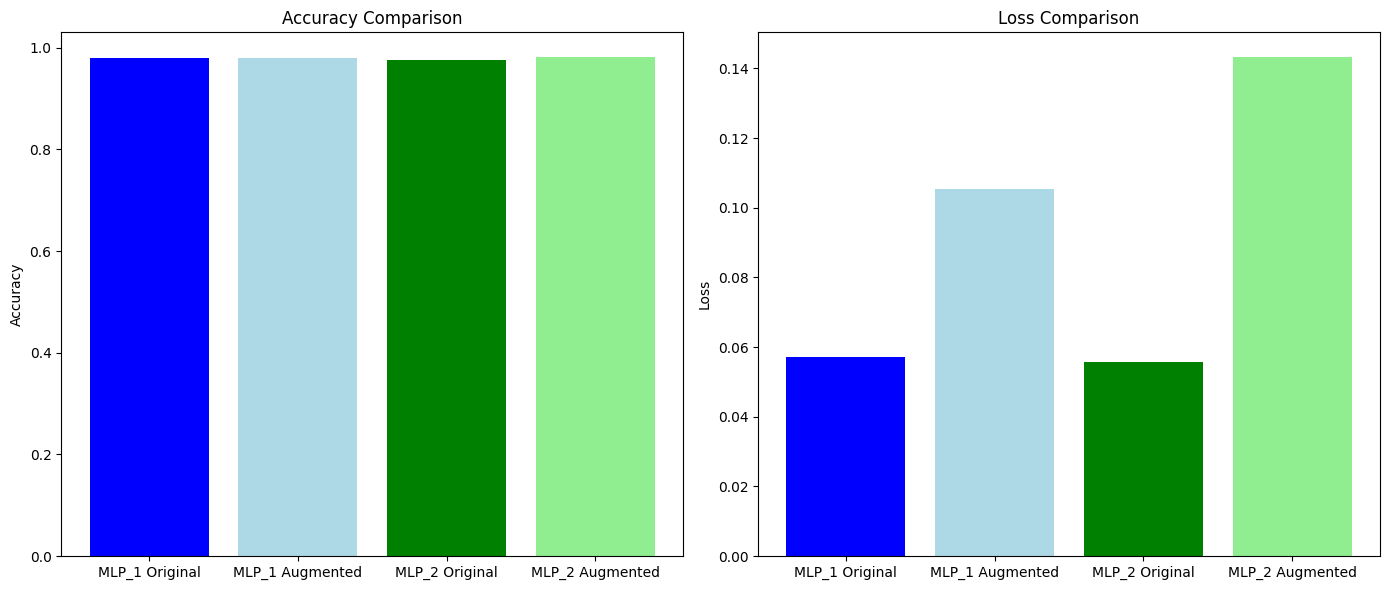

In [ ]:
# 모델 평가 결과를 저장할 딕셔너리 초기화
comparison_results = {
    "MLP_1": {"Original": {}, "Augmented": {}},
    "MLP_2": {"Original": {}, "Augmented": {}}
}

# (앙상블 전) 두 모델 성능 기록. 원래 데이터셋-증강 데이터셋 순
comparison_results["MLP_1"]["Original"]["Loss"], comparison_results["MLP_1"]["Original"]["Accuracy"] = mlp1_loss, mlp1_accuracy
comparison_results["MLP_1"]["Augmented"]["Loss"], comparison_results["MLP_1"]["Augmented"]["Accuracy"] = mlp1_loss_dataAugmentation, mlp1_accuracy_dataAugmentation

comparison_results["MLP_2"]["Original"]["Loss"], comparison_results["MLP_2"]["Original"]["Accuracy"] = mlp2_loss, mlp2_accuracy
comparison_results["MLP_2"]["Augmented"]["Loss"], comparison_results["MLP_2"]["Augmented"]["Accuracy"] = mlp2_loss_dataAugmentation, mlp2_accuracy_dataAugmentation

# 결과 출력
print(comparison_results)

# 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy 비교
axes[0].bar(["MLP_1 Original", "MLP_1 Augmented", "MLP_2 Original", "MLP_2 Augmented"],
            [comparison_results["MLP_1"]["Original"]["Accuracy"], comparison_results["MLP_1"]["Augmented"]["Accuracy"],
             comparison_results["MLP_2"]["Original"]["Accuracy"], comparison_results["MLP_2"]["Augmented"]["Accuracy"]],
            color=['blue', 'lightblue', 'green', 'lightgreen'])
axes[0].set_title("Accuracy Comparison")
axes[0].set_ylabel("Accuracy")

# Loss 비교
axes[1].bar(["MLP_1 Original", "MLP_1 Augmented", "MLP_2 Original", "MLP_2 Augmented"],
            [comparison_results["MLP_1"]["Original"]["Loss"], comparison_results["MLP_1"]["Augmented"]["Loss"],
             comparison_results["MLP_2"]["Original"]["Loss"], comparison_results["MLP_2"]["Augmented"]["Loss"]],
            color=['blue', 'lightblue', 'green', 'lightgreen'])
axes[1].set_title("Loss Comparison")
axes[1].set_ylabel("Loss")

# 그래프 보여주기
plt.tight_layout()
plt.show()


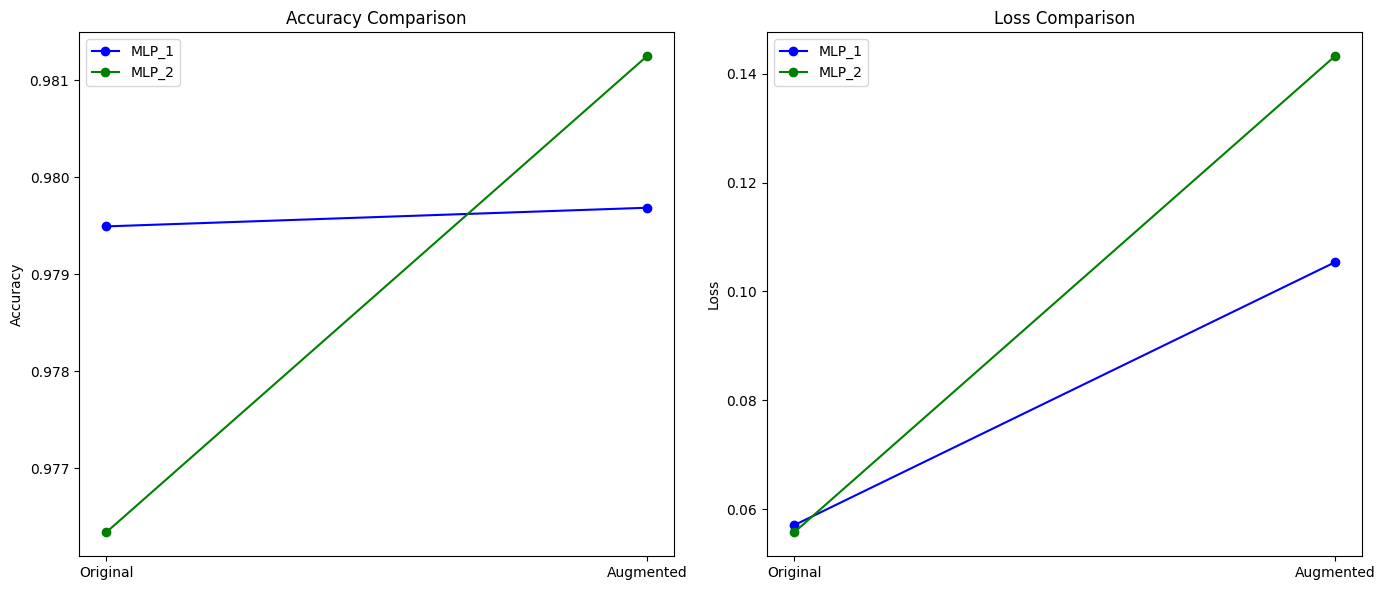

In [ ]:
# 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy 비교
axes[0].plot(["Original", "Augmented"], [comparison_results["MLP_1"]["Original"]["Accuracy"], comparison_results["MLP_1"]["Augmented"]["Accuracy"]], marker='o', color='blue', label='MLP_1')
axes[0].plot(["Original", "Augmented"], [comparison_results["MLP_2"]["Original"]["Accuracy"], comparison_results["MLP_2"]["Augmented"]["Accuracy"]], marker='o', color='green', label='MLP_2')
axes[0].set_title("Accuracy Comparison")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Loss 비교
axes[1].plot(["Original", "Augmented"], [comparison_results["MLP_1"]["Original"]["Loss"], comparison_results["MLP_1"]["Augmented"]["Loss"]], marker='o', color='blue', label='MLP_1')
axes[1].plot(["Original", "Augmented"], [comparison_results["MLP_2"]["Original"]["Loss"], comparison_results["MLP_2"]["Augmented"]["Loss"]], marker='o', color='green', label='MLP_2')
axes[1].set_title("Loss Comparison")
axes[1].set_ylabel("Loss")
axes[1].legend()

# 그래프 보여주기
plt.tight_layout()
plt.show()


<ipython-input-21-d7b9a5797070>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(["MLP_1 Original", "MLP_1 Augmented", "MLP_2 Original", "MLP_2 Augmented", "Soft Voting Original", "Soft Voting Augmented", "Bagging Original", "Bagging Augmented"], rotation=45)
<ipython-input-21-d7b9a5797070>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(["MLP_1 Original", "MLP_1 Augmented", "MLP_2 Original", "MLP_2 Augmented", "Soft Voting Original", "Soft Voting Augmented", "Bagging Original", "Bagging Augmented"], rotation=45)


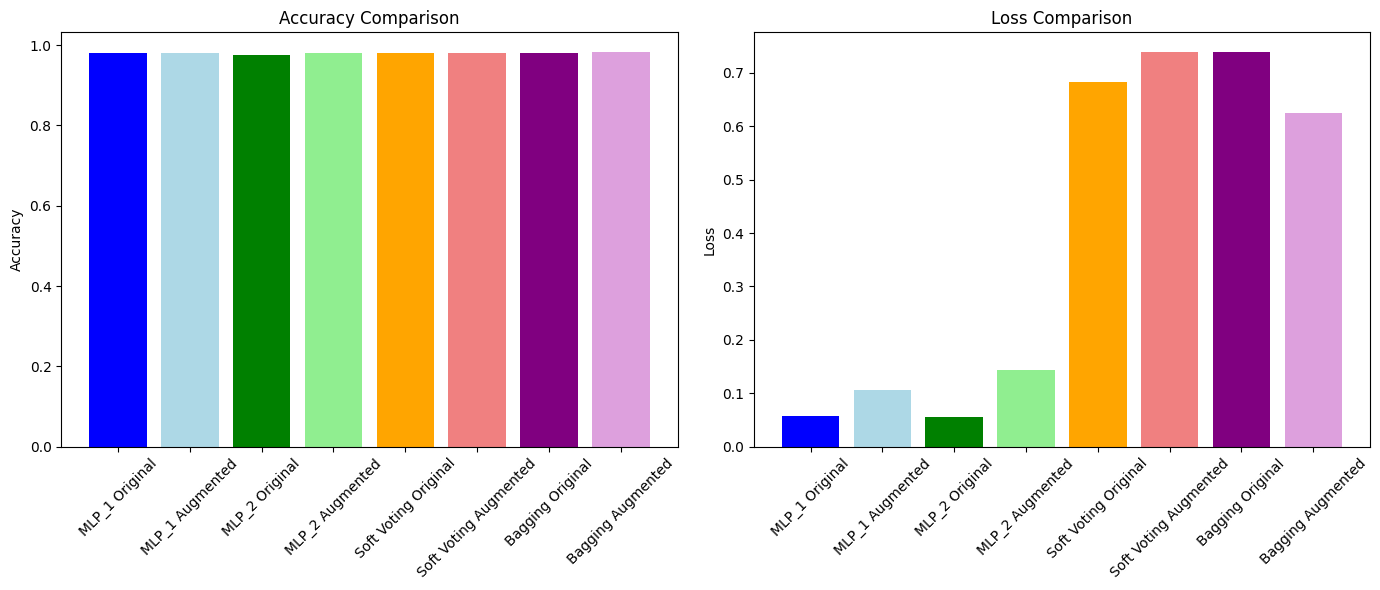

In [ ]:
# 모델 평가 결과를 저장할 딕셔너리 초기화
# comparison_results = {
#     "MLP_1": {"Original": {}, "Augmented": {}},
#     "MLP_2": {"Original": {}, "Augmented": {}}
# }

# # (앙상블 전) 두 모델 성능 기록. 원래 데이터셋-증강 데이터셋 순
# comparison_results["MLP_1"]["Original"]["Loss"], comparison_results["MLP_1"]["Original"]["Accuracy"] = mlp1_loss, mlp1_accuracy
# comparison_results["MLP_1"]["Augmented"]["Loss"], comparison_results["MLP_1"]["Augmented"]["Accuracy"] = mlp1_loss_dataAugmentation, mlp1_accuracy_dataAugmentation

# comparison_results["MLP_2"]["Original"]["Loss"], comparison_results["MLP_2"]["Original"]["Accuracy"] = mlp2_loss, mlp2_accuracy
# comparison_results["MLP_2"]["Augmented"]["Loss"], comparison_results["MLP_2"]["Augmented"]["Accuracy"] = mlp2_loss_dataAugmentation, mlp2_accuracy_dataAugmentation

# 결과 출력
# print(comparison_results)

# 앙상블 모델 평가 결과를 저장할 딕셔너리 초기화
comparison_results_ensembles = {
    "Soft Voting": {"Original": {}, "Augmented": {}},
    "Bagging": {"Original": {}, "Augmented": {}}
}

# 앙상블 모델 성능 기록. 원래 데이터셋-증강 데이터셋 순
comparison_results_ensembles["Soft Voting"]["Original"]["Loss"], comparison_results_ensembles["Soft Voting"]["Original"]["Accuracy"] = softVoting_loss, softVoting_accuracy
comparison_results_ensembles["Soft Voting"]["Augmented"]["Loss"], comparison_results_ensembles["Soft Voting"]["Augmented"]["Accuracy"] = softVoting_loss_dataAugmentation, softVoting_accuracy_dataAugmentation

comparison_results_ensembles["Bagging"]["Original"]["Loss"], comparison_results_ensembles["Bagging"]["Original"]["Accuracy"] = bagging_loss, bagging_accuracy
comparison_results_ensembles["Bagging"]["Augmented"]["Loss"], comparison_results_ensembles["Bagging"]["Augmented"]["Accuracy"] = bagging_loss_dataAugmentation, bagging_accuracy_dataAugmentation

# 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy 비교
axes[0].bar(["MLP_1 Original", "MLP_1 Augmented", "MLP_2 Original", "MLP_2 Augmented", "Soft Voting Original", "Soft Voting Augmented", "Bagging Original", "Bagging Augmented"],
            [comparison_results["MLP_1"]["Original"]["Accuracy"], comparison_results["MLP_1"]["Augmented"]["Accuracy"],
             comparison_results["MLP_2"]["Original"]["Accuracy"], comparison_results["MLP_2"]["Augmented"]["Accuracy"],
             comparison_results_ensembles["Soft Voting"]["Original"]["Accuracy"], comparison_results_ensembles["Soft Voting"]["Augmented"]["Accuracy"],
             comparison_results_ensembles["Bagging"]["Original"]["Accuracy"], comparison_results_ensembles["Bagging"]["Augmented"]["Accuracy"],
             ],
            color=['blue', 'lightblue', 'green', 'lightgreen', 'orange', 'lightcoral', 'purple', 'plum'])
axes[0].set_title("Accuracy Comparison")
axes[0].set_ylabel("Accuracy")

# Loss 비교
axes[1].bar(["MLP_1 Original", "MLP_1 Augmented", "MLP_2 Original", "MLP_2 Augmented", "Soft Voting Original", "Soft Voting Augmented", "Bagging Original", "Bagging Augmented"],
            [comparison_results["MLP_1"]["Original"]["Loss"], comparison_results["MLP_1"]["Augmented"]["Loss"],
             comparison_results["MLP_2"]["Original"]["Loss"], comparison_results["MLP_2"]["Augmented"]["Loss"],
             comparison_results_ensembles["Soft Voting"]["Original"]["Loss"], comparison_results_ensembles["Soft Voting"]["Augmented"]["Loss"],
             comparison_results_ensembles["Bagging"]["Original"]["Loss"], comparison_results_ensembles["Bagging"]["Augmented"]["Loss"],
             ],
            color=['blue', 'lightblue', 'green', 'lightgreen', 'orange', 'lightcoral', 'purple', 'plum'])
axes[1].set_title("Loss Comparison")
axes[1].set_ylabel("Loss")

# x축 레이블에 45도 회전 적용
axes[0].set_xticklabels(["MLP_1 Original", "MLP_1 Augmented", "MLP_2 Original", "MLP_2 Augmented", "Soft Voting Original", "Soft Voting Augmented", "Bagging Original", "Bagging Augmented"], rotation=45)
axes[1].set_xticklabels(["MLP_1 Original", "MLP_1 Augmented", "MLP_2 Original", "MLP_2 Augmented", "Soft Voting Original", "Soft Voting Augmented", "Bagging Original", "Bagging Augmented"], rotation=45)

# 그래프 보여주기
plt.tight_layout()
plt.show()


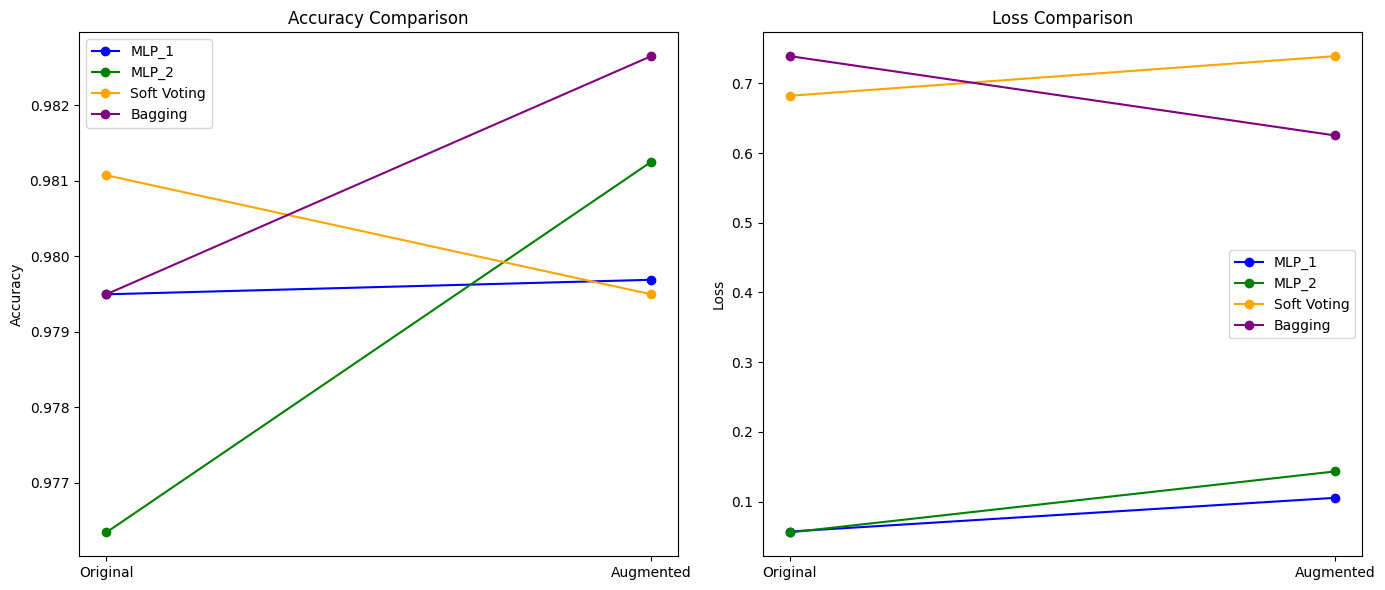

In [ ]:
# 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy 비교
axes[0].plot(["Original", "Augmented"], [comparison_results["MLP_1"]["Original"]["Accuracy"], comparison_results["MLP_1"]["Augmented"]["Accuracy"]], marker='o', color='blue', label='MLP_1')
axes[0].plot(["Original", "Augmented"], [comparison_results["MLP_2"]["Original"]["Accuracy"], comparison_results["MLP_2"]["Augmented"]["Accuracy"]], marker='o', color='green', label='MLP_2')
axes[0].plot(["Original", "Augmented"], [comparison_results_ensembles["Soft Voting"]["Original"]["Accuracy"], comparison_results_ensembles["Soft Voting"]["Augmented"]["Accuracy"]], marker='o', color='orange', label='Soft Voting')
axes[0].plot(["Original", "Augmented"], [comparison_results_ensembles["Bagging"]["Original"]["Accuracy"], comparison_results_ensembles["Bagging"]["Augmented"]["Accuracy"]], marker='o', color='purple', label='Bagging')
axes[0].set_title("Accuracy Comparison")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Loss 비교
axes[1].plot(["Original", "Augmented"], [comparison_results["MLP_1"]["Original"]["Loss"], comparison_results["MLP_1"]["Augmented"]["Loss"]], marker='o', color='blue', label='MLP_1')
axes[1].plot(["Original", "Augmented"], [comparison_results["MLP_2"]["Original"]["Loss"], comparison_results["MLP_2"]["Augmented"]["Loss"]], marker='o', color='green', label='MLP_2')
axes[1].plot(["Original", "Augmented"], [comparison_results_ensembles["Soft Voting"]["Original"]["Loss"], comparison_results_ensembles["Soft Voting"]["Augmented"]["Loss"]], marker='o', color='orange', label='Soft Voting')
axes[1].plot(["Original", "Augmented"], [comparison_results_ensembles["Bagging"]["Original"]["Loss"], comparison_results_ensembles["Bagging"]["Augmented"]["Loss"]], marker='o', color='purple', label='Bagging')
axes[1].set_title("Loss Comparison")
axes[1].set_ylabel("Loss")
axes[1].legend()

# 그래프 보여주기
plt.tight_layout()
plt.show()
